# [3920] Homework 1 - Exploratory Data Analysis & Data Preparation
Data files:
* Part 1: Exploratory Data Analysis - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/white_wine_quality.csv
* Part 2: Data Preparation - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/shoppers.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 2:30 PM on the due date
  * No late submission will be accepted
* Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework 1 Requirements
* Part 1: Exploratory Data Analysis
  * Load data and examine data
  * Generate summary statistics
  * Display bar graph showing the distribution of the classes of the dependent variable
  * Display correlation matrix for all variables
* Part 2: Data Preparation
  * Load data and examine data
  * Identify missing values and use SimpleImputer to replace missing values
  * Generate one-hot encodings
  * Perform label encoding
  * Standardize independent variables

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 10/17/24 07:15:44


## Part 1: Exploratory Data Analysis

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data file (white_wine_quality.csv) into a dataframe
#  NOTE: field separator is ';'
df = pd.read_csv("https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/white_wine_quality.csv", sep = ';')

### Examine data

In [4]:
# Display dataframe shape
df.shape

(4898, 12)

In [5]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Generate summary statistics on data

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate insights on the dependent variable
#### Dependent  variable is quality

In [7]:
# Display the distinct classes
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
# Display the distribution counts for each class
df.groupby('quality').size()

,0
quality,
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


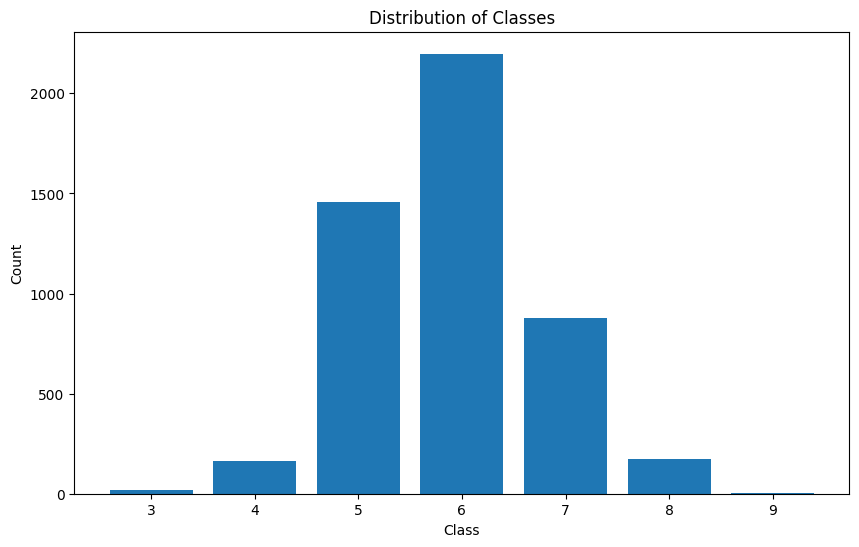

In [9]:
# Graph (i.e. bar graph) the distribution of the classes

class_counts = df['quality'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

### Display the correlation matrix for all variables

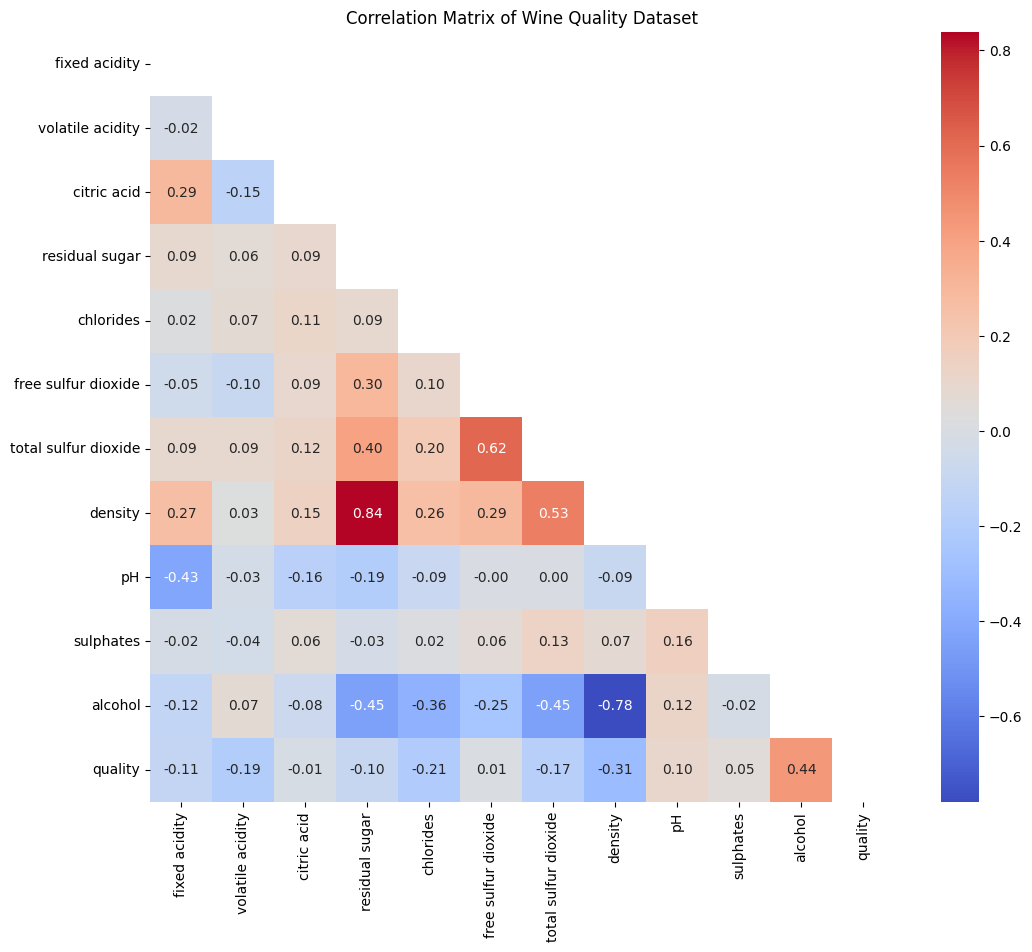

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

## Part 2: Data Preparation

### NOTE: Final dataframe must be ready for model training (i.e. all numeric and scaled values)

### Import libraries

In [11]:
from sklearn.impute import SimpleImputer             # for handling missing data
from sklearn.preprocessing import LabelEncoder       # for encoding label data
from sklearn.preprocessing import StandardScaler     # for standardizing the data

### Load data
* Independent variables: Region, Age, Income
* Dependent variable: Online_Shopper

In [12]:
# Read data file (shoppers.csv) into a dataframe
df2 = pd.read_csv("https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/shoppers.csv")

### Examine data

In [13]:
# Display dataframe
df2

,Region,Age,Income,Online_Shopper
0,India,49.0,NaN,No
1,Brazil,32.0,57600.0,Yes
2,USA,NaN,NaN,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,NaN,No
9,India,NaN,80400.0,Yes


### Identify missing values

In [14]:
df2.isnull().sum()

,0
Region,0
Age,3
Income,4
Online_Shopper,0


### Impute missing values

#### Use the SimpleImputer to replace ALL missing values

In [15]:
numeric_features = df2.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df2[numeric_features] = imputer.fit_transform(df2[numeric_features])

### Recheck missing values

In [16]:
df2.isnull().sum()

,0
Region,0
Age,0
Income,0
Online_Shopper,0


### Display updated dataframe

In [17]:
df2

,Region,Age,Income,Online_Shopper
0,India,49.000000,73000.0,No
1,Brazil,32.000000,57600.0,Yes
2,USA,45.285714,73000.0,No
3,Brazil,43.000000,73200.0,No
4,USA,45.000000,73000.0,Yes
5,India,40.000000,69600.0,Yes
6,Brazil,45.285714,62400.0,No
7,India,53.000000,94800.0,Yes
8,USA,55.000000,73000.0,No
9,India,45.285714,80400.0,Yes


### Generate one-hot encodings for Region column

In [18]:
df2 = pd.get_dummies(df2, columns=['Region'], prefix=['Region'])
df2 = df2.replace({True: 1, False: 0})

<ipython-input-18-4a1d0b303441>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace({True: 1, False: 0})


### Encode labels

In [19]:
# Encode Online Shopper column
df2['Online_Shopper'] = LabelEncoder().fit_transform(df2['Online_Shopper'])

### Standardize independent variables

In [20]:
scaler = StandardScaler()

independent_variables = df2.drop('Online_Shopper', axis=1)
scaled_independent_variables = scaler.fit_transform(independent_variables)

df2_scaled = pd.DataFrame(scaled_independent_variables, columns=independent_variables.columns)
df2 = df2_scaled.join(df2['Online_Shopper'])

### Display entire final dataframe

In [21]:
df2

,Age,Income,Region_Brazil,Region_India,Region_USA,Online_Shopper
0,0.604586,0.000000,-0.654654,1.224745,-0.654654,0
1,-2.162557,-1.631371,1.527525,-0.816497,-0.654654,1
2,0.000000,0.000000,-0.654654,-0.816497,1.527525,0
3,-0.372053,0.021187,1.527525,-0.816497,-0.654654,0
4,-0.046507,0.000000,-0.654654,-0.816497,1.527525,1
5,-0.860372,-0.360173,-0.654654,1.224745,-0.654654,1
6,0.000000,-1.122891,1.527525,-0.816497,-0.654654,0
7,1.255678,2.309343,-0.654654,1.224745,-0.654654,1
8,1.581224,0.000000,-0.654654,-0.816497,1.527525,0
9,0.000000,0.783905,-0.654654,1.224745,-0.654654,1
